In [1]:
# 1.Import Requirements
# !pip install tensorflow

In [2]:
import cv2
import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
#2.Keypoints using MP Holistic 


In [4]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [5]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #color conversion BGR to RGB
    image.flags.writeable = False #Image is no longer writeable
    results = model.process(image) #Make prediction
    image.flags.writeable = True #Image is now writeable
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #color conversion RGB to BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [9]:
cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #Read Feed
        ret,frame = cap.read()
        #Make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        #Draw landmarks
        draw_styled_landmarks(image,results)
        #Show to screen
        cv2.imshow('OpenCv Feed', image)
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

C:\Users\doanm\AppData\Roaming\Python\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
results.left_hand_landmarks

landmark {
  x: 0.718664944
  y: 0.865222096
  z: 2.94688107e-007
}
landmark {
  x: 0.617016554
  y: 0.826946318
  z: -0.0266289357
}
landmark {
  x: 0.540266514
  y: 0.721761763
  z: -0.0367654972
}
landmark {
  x: 0.500064731
  y: 0.618490219
  z: -0.0478961095
}
landmark {
  x: 0.464043885
  y: 0.533399105
  z: -0.0585894547
}
landmark {
  x: 0.575025499
  y: 0.551741064
  z: 0.0002284293
}
landmark {
  x: 0.524054408
  y: 0.436660886
  z: -0.0251962207
}
landmark {
  x: 0.490344197
  y: 0.367078125
  z: -0.0498400144
}
landmark {
  x: 0.463283718
  y: 0.302944392
  z: -0.0687920079
}
landmark {
  x: 0.625725329
  y: 0.513202131
  z: -0.0102935908
}
landmark {
  x: 0.585720599
  y: 0.370056957
  z: -0.0335008614
}
landmark {
  x: 0.555220783
  y: 0.281203657
  z: -0.058844205
}
landmark {
  x: 0.52862525
  y: 0.204540014
  z: -0.0775011107
}
landmark {
  x: 0.677895606
  y: 0.504625678
  z: -0.0274572615
}
landmark {
  x: 0.64760071
  y: 0.35920018
  z: -0.0526420884
}
landmark {
  

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
frame

array([[[151, 147, 148],
        [151, 147, 148],
        [151, 147, 148],
        ...,
        [156, 156, 156],
        [156, 156, 156],
        [156, 156, 156]],

       [[152, 147, 148],
        [152, 147, 148],
        [152, 147, 148],
        ...,
        [156, 156, 156],
        [156, 156, 156],
        [156, 156, 156]],

       [[153, 148, 149],
        [152, 147, 148],
        [152, 147, 148],
        ...,
        [156, 156, 156],
        [156, 156, 156],
        [156, 156, 156]],

       ...,

       [[ 73,  73,  73],
        [ 80,  80,  80],
        [ 88,  88,  88],
        ...,
        [126, 123, 121],
        [125, 123, 120],
        [124, 123, 120]],

       [[ 74,  74,  74],
        [ 83,  83,  83],
        [ 86,  86,  86],
        ...,
        [127, 124, 123],
        [126, 123, 122],
        [125, 122, 122]],

       [[ 72,  72,  72],
        [ 83,  83,  83],
        [ 86,  86,  86],
        ...,
        [127, 124, 123],
        [127, 122, 123],
        [126, 121, 123]]

In [13]:
draw_landmarks(frame,results)

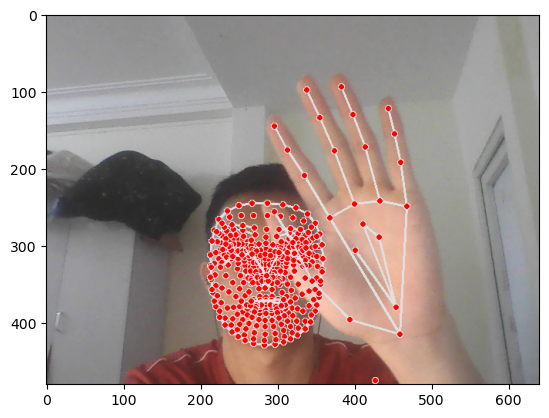

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [15]:
#Extract KeyPoints Value

In [16]:
len(results.pose_landmarks.landmark)

33

In [17]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y, res.z, res.visibility])
    pose.append(test)

In [18]:
len(pose)

33

In [19]:
results.face_landmarks.landmark

[x: 0.445432693
y: 0.765930355
z: -0.0371698104
, x: 0.444157869
y: 0.708318233
z: -0.0535704307
, x: 0.444597542
y: 0.72895664
z: -0.0316014253
, x: 0.436151534
y: 0.663998365
z: -0.0348315798
, x: 0.444257617
y: 0.692932665
z: -0.0554147847
, x: 0.444612592
y: 0.675318956
z: -0.0492114909
, x: 0.445645839
y: 0.635189295
z: -0.0159575157
, x: 0.371622592
y: 0.635611653
z: 0.0219045952
, x: 0.44655484
y: 0.60239929
z: -0.0042399657
, x: 0.447174847
y: 0.582686663
z: -0.00334811653
, x: 0.44937408
y: 0.51161027
z: 0.0182614233
, x: 0.44552654
y: 0.773881733
z: -0.0363848694
, x: 0.4455688
y: 0.780952811
z: -0.0334169641
, x: 0.445568293
y: 0.784747601
z: -0.0294410307
, x: 0.446010381
y: 0.786634803
z: -0.0308345426
, x: 0.446009696
y: 0.79259789
z: -0.0329932161
, x: 0.445943385
y: 0.800748706
z: -0.0361396708
, x: 0.445877075
y: 0.809784353
z: -0.0359657444
, x: 0.445157528
y: 0.827085137
z: -0.028423626
, x: 0.444197804
y: 0.717491329
z: -0.0493558049
, x: 0.435574621
y: 0.719169796


In [20]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [21]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
result_test = extract_keypoints(results)

In [25]:
result_test

array([ 0.44708744,  0.70732564, -1.25093997, ...,  0.        ,
        0.        ,  0.        ])

In [26]:
#Setup Folders for Collection

In [27]:
#Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')
#Action that we try to detect
actions = np.array(['an', 'xin_chao', 'tam_biet'])
#Thirty videos worth of data
no_sequences = 30
#Videos are going to be 30 frames in length
sequence_length = 30

In [28]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [29]:
#Collect Keypoints Values For Training and Testing

In [30]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [31]:
# cap.release()
cv2.destroyAllWindows()

In [32]:
#Preprocess Data and Create Labels and Features

In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [34]:
label_map = {label:num for num, label in enumerate(actions)}

In [35]:
label_map

{'an': 0, 'xin_chao': 1, 'tam_biet': 2}

In [36]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [37]:
np.array(sequences).shape

(90, 30, 1662)

In [38]:
np.array(labels).shape

(90,)

In [39]:
X = np.array(sequences)

In [40]:
X

array([[[ 0.46413952,  0.75677544, -1.37802804, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.45964274,  0.73717409, -0.9297021 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.45781079,  0.72593713, -0.90612948, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.45659885,  0.70315212, -0.86652517, ...,  0.47115937,
          0.81484056,  0.0055255 ],
        [ 0.45658594,  0.70317417, -0.85392714, ...,  0.4778012 ,
          0.81116122,  0.00600168],
        [ 0.45677924,  0.70318586, -0.86758357, ...,  0.47023743,
          0.82378495,  0.00459371]],

       [[ 0.45717669,  0.70319933, -0.87594157, ...,  0.46854344,
          0.82290655,  0.0040332 ],
        [ 0.46042401,  0.71851993, -0.91478407, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.4632377 ,  0.72401971, -0.91295767, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.452429  ,  0.72173214, -0.87592304, ...,  

In [41]:
y = to_categorical(labels).astype(int)

In [42]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [44]:
y_train.shape

(85, 3)

In [45]:
#Build and Train LSTM Neural Network

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [47]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [48]:
X.shape

(90, 30, 1662)

In [49]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\doanm\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
res = [.7, 0.2, 0.1]

In [51]:
actions[np.argmax(res)]

'an'

In [52]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [53]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - categorical_accuracy: 0.3444 - loss: 1.7046
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.4169 - loss: 1.1209
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.4148 - loss: 1.0201
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.2720 - loss: 2.2145
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - categorical_accuracy: 0.3326 - loss: 9.5326
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.2641 - loss: 4.5431
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3325 - loss: 1.8672
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.2818 - loss: 5.8281
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - categorical_accuracy: 0.2349 - loss: 4.4903
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.2642 - loss: 2.5843
Epoch 11/2000
3/3 ━━━━━━━━━━

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [55]:
#Model Prediction

In [56]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


In [57]:
actions[np.argmax(res[3])]

'xin_chao'

In [58]:
model.save('action.h5')

In [59]:
model.save('action.h5')

In [60]:
model.load_weights('action.h5')

In [61]:
#Evaluation using Confusion Matrix and Accuracy

In [62]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [63]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [64]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [65]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [1, 0]],

       [[0, 1],
        [1, 3]],

       [[4, 1],
        [0, 0]]], dtype=int64)

In [66]:
accuracy_score(ytrue, yhat)

0.6

In [67]:
#Test in Real Time

In [74]:
#1.New detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #Read Feed
        ret,frame = cap.read()
        #Make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        #Draw landmarks
        draw_styled_landmarks(image,results)
        #2.Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        #3. Viz logic
        if res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])
        if len(sentence) > 5:
            sentence = sentence[-5:]
        cv2.rectangle(image, (0,0), (640,40), (245,117,16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        #Show to screen
        cv2.imshow('OpenCv Feed', image)
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [72]:
res[np.argmax(res)] > threshold

True

In [69]:
# np.expand_dims(X_test[0], axis=0)